In [1]:
#ALGORITMA DBSCAN
#STATISTIKA DATA MINING
#Deadline : 11 April 2022

#Kelompok 3
#Pada praktikum kali ini dilakukan pemrograman DBSCAN untuk mengelompokkan data point pada gugus terbuka di piringan galaksi yang berasal dari katalog NCOVOCC
#dengan fitur yang digunakan adalah RA dan Dec

#mengimport libraries
import pandas as pd                   #pandas merupakan library untuk struktur dan analisis data
import numpy as np                    #numpy untuk mengonversi list menjadi array agar lebih mudah dikomputasi
import matplotlib                     #matplotlib adalah library untuk pengolahan hingga visualisasi data
import matplotlib.pyplot as plt       #untuk memplot grafik

#sklearn atau scikit learn untuk processing data dalam kebutuhan machine learning
from sklearn.cluster import DBSCAN    #import DBSCAN dari sklearn.cluster 
from sklearn.neighbors import NearestNeighbors      #Unsupervised learn untuk mencari tetangga/neighbors


In [2]:
#membaca file dengan data frame. Data frame adalah struktur data 2 dimensi berupa baris dan kolom (tabular)
df = pd.read_csv('data_SDM.csv')

In [3]:
df


,RA,Dec
0,0.050,60.967
1,0.087,50.742
2,0.404,64.625
3,0.558,67.417
4,0.875,63.583
...,...,...
1484,359.350,56.708
1485,359.350,61.633
1486,359.600,61.208
1487,359.654,60.035


Terdapat 1489 titik data dalam koordinat RA dan Deklinasi

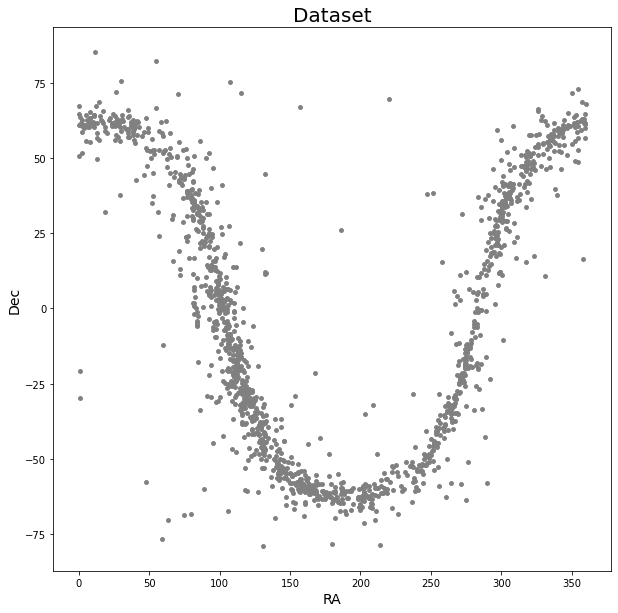

In [4]:
#Plot RA terhadap Dec

plt.figure(figsize=(10,10))              #plt.figure untuk membuat objek gambar (grafik). figsize untuk menspesifikasikan lebar dan tinggi dari gambar, satuan inci
plt.scatter(df['RA'],df['Dec'],s=15,color='grey')         #memplot setiap titik data pengamatan. RA sebagai sumbu x dan Dec sebagai sumbu y. s adalah size dari data point 
plt.title('Dataset',fontsize=20)          #membuat judul grafik, 'Dataset', dengan ukuran font 20
plt.xlabel('RA',fontsize=14)              #memberi label sb x dengan RA dengan ukuran font 14
plt.ylabel('Dec',fontsize=14)             #memberi label sb y dengan Dec dengan ukuran font 14
plt.show()                                #menampilkan grafik

In [5]:
#Melakukan DBSCAN dengan nilai parameter default
dbscan=DBSCAN()
dbscan.fit(df[['RA', 'Dec']])

DBSCAN()

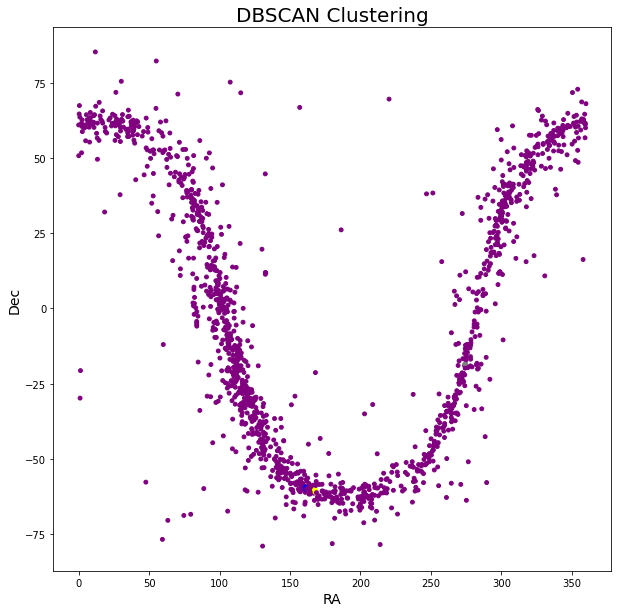

In [6]:
#Plotting hasil DBSCAN dengan nilai parameter default
colors=['purple','red','blue','green', 'yellow', 'black', 'grey']    #list warna untuk dipetakan          
df['DBSCAN_labels']=dbscan.labels_              #labels untuk mengambil label
plt.figure(figsize=(10,10))                    
plt.scatter(df['RA'],df['Dec'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)        #memplot grafik dengan scatter. cmap untuk memetakan colors dari titik data
plt.title('DBSCAN Clustering',fontsize=20)                  #membuat judul grafik, 'DBSCAN Clustering', dengan ukuran font 20
plt.xlabel('RA',fontsize=14)              #memberi label sb x dengan RA dengan ukuran font 14
plt.ylabel('Dec',fontsize=14)             #memberi label sb y dengan Dec dengan ukuran font 14
plt.show()                                #menampilkan grafik

Didapatkan plot dengan mayoritas warna ungu yang merepresentasikan data noise. Hal ini karena nilai parameter epsilon terlalu kecil (defaultnya 0.5) sehingga harus dicari nilai epsilon yang optimal. Parameter epsilon menyatakan jarak terpendek untuk 2 titik dikatakan sebagai neighbor

In [7]:
#Menentukan jarak untuk K-distance plot
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['RA', 'Dec']])
distances, indices = nbrs.kneighbors(df[['RA', 'Dec']]) #jarak terdekat titik ke data point lainnys di dataset

Untuk mencari nilai epsilon, digunakan grafik K-distance. Untuk membuat plot K-distance, dibutuhkan jarak antara suatu titik dengan datapoint terdekat untuk seluruh datapoint pada dataset. Ini dapat diperoleh dengan menggunakan NearestNeighbors from sklearn.neighbors.

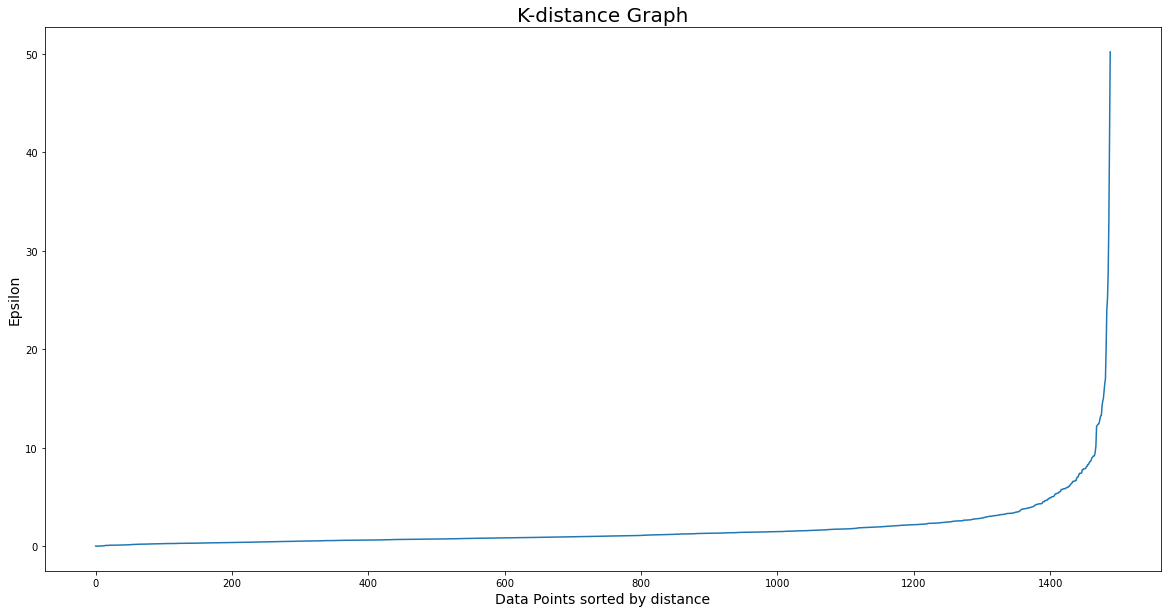

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Nilai optimum epsilon diambil dari titik maksimum dari kurvatur pada plot K-distance, yaitu 5

In [9]:
#DBSCAN dengan nilai parameter epsilon=5 dan min_samples=4
dbscan_opt=DBSCAN(eps=5,min_samples=6)
dbscan_opt.fit(df[['RA', 'Dec']])

DBSCAN(eps=5, min_samples=6)

In [10]:
# Memisahkan noise dari dataset
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 1    726
 4    439
-1    171
 0    128
 3     16
 5      6
 2      3
Name: DBSCAN_opt_labels, dtype: int64

Diperoleh 6 buah klaster dengan 171 data noise

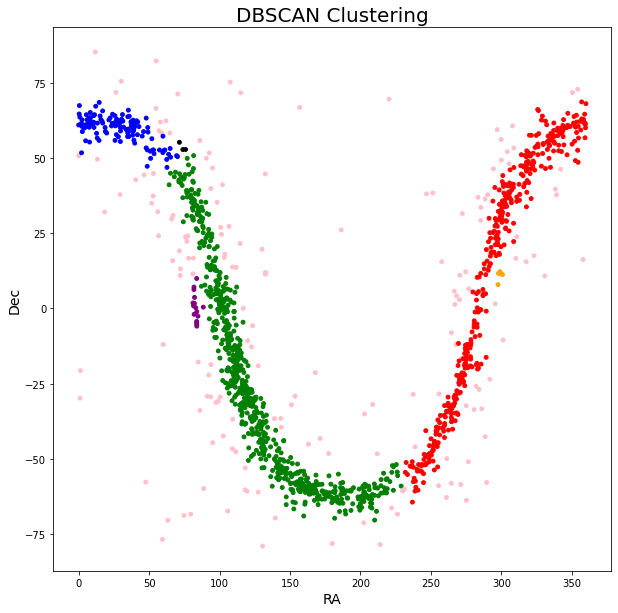

In [47]:
#Plotting hasil DBSCAN
plt.figure(figsize=(10,10))
plt.scatter(df['RA'],df['Dec'],c=df['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(['pink','blue','green','black',
                                                 'purple','red','orange']),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('RA',fontsize=14)
plt.ylabel('Dec', fontsize=14)
plt.show()

diperoleh 6 klaster yang direpresentasikan oleh warna merah, biru, hijau, orange, ungu dan hitam dan data noise yang direpresentasikan oleh warna pink